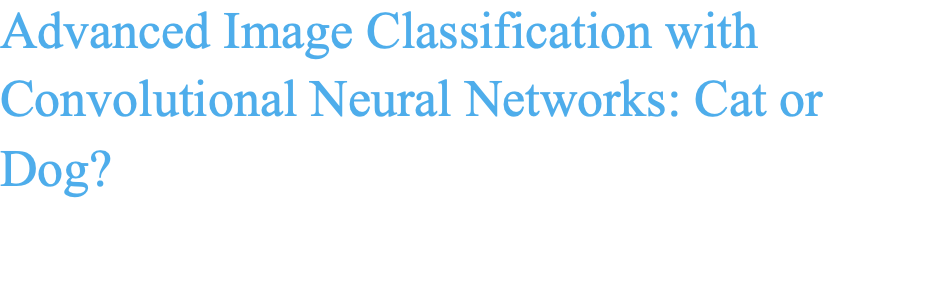

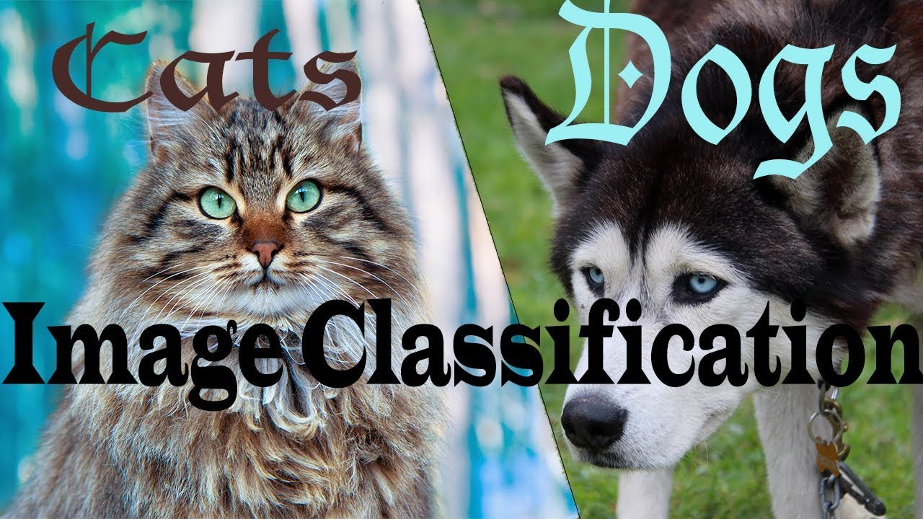

# **Importing the Importing the Libraries**

In [3]:
# Standard libraries for file system and random number generation
import os
import random

# Libraries for working with images
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Libraries for working with machine learning models
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization



# Libraries for data visualization
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# Libraries for working with ZIP archives and arrays
import zipfile
import numpy as np

# **Mounting the Google Drive**

In [4]:
# Import the Google Drive module from Colab
from google.colab import drive

# Mount the user's Google Drive to the Colab notebook
drive.mount('/content/drive')


Mounted at /content/drive


# **Extracting the zip file from google drive**

In [5]:
#Create a new instance of the ZipFile class from the zipfile module
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dogs-vs-cats-vvsmall.zip', 'r')  

#This line calls the extractall() method on the zip_ref object to extract all the files and directories from the archive and save them to the /tmp directory.
zip_ref.extractall('/tmp')

#This line closes the zip_ref object, freeing up any system resources it was using.
zip_ref.close()

# **Set up directories for organizing and loading image data for the model.**

In [6]:
# Set the base directory where the data is located
base_dir = '/tmp/dogs-vs-cats-vvsmall'

# Set the directory for the training data
train_dir = os.path.join(base_dir,'train')

# Set the directory for the validation data
validation_dir = os.path.join(base_dir, 'validation')

# Set the directory for the training cat images
train_cat_dir = os.path.join(train_dir, 'cats')

# Set the directory for the training dog images
train_dog_dir = os.path.join(train_dir, 'dogs')

# Set the directory for the validation cat images
validation_cat_dir = os.path.join(validation_dir, 'cats')

# Set the directory for the validation dog images
validation_dog_dir = os.path.join(validation_dir, 'dogs')

# **Retrieve a list of the first 10 filenames for each set of cat and dog images for both the training and validation data directories, for verification.**

In [7]:
# Get a list of the filenames for the training cat images
train_cat_names = os.listdir(train_cat_dir)

# Print the first 10 filenames in the list
print(train_cat_names[:10])

# Get a list of the filenames for the training dog images
train_dog_names = os.listdir(train_dog_dir)

# Print the first 10 filenames in the list
print(train_dog_names[:10])

# Get a list of the filenames for the validation cat images
validation_cat_hames = os.listdir(validation_cat_dir)

# Print the first 10 filenames in the list
print(validation_cat_hames[:10])

# Get a list of the filenames for the validation dog images
validation_dog_names = os.listdir(validation_dog_dir)

# Print the first 10 filenames in the list
print(validation_dog_names[:10])


['cat.980.jpg', 'cat.739.jpg', 'cat.954.jpg', 'cat.1338.jpg', 'cat.1661.jpg', 'cat.332.jpg', 'cat.3.jpg', 'cat.2080.jpg', 'cat.2283.jpg', 'cat.1895.jpg']
['dog.2413.jpg', 'dog.2065.jpg', 'dog.2702.jpg', 'dog.933.jpg', 'dog.2480.jpg', 'dog.2836.jpg', 'dog.2167.jpg', 'dog.116.jpg', 'dog.1661.jpg', 'dog.528.jpg']
['cat.9017.jpg', 'cat.8914.jpg', 'cat.8578.jpg', 'cat.8918.jpg', 'cat.8924.jpg', 'cat.9286.jpg', 'cat.9117.jpg', 'cat.8781.jpg', 'cat.9218.jpg', 'cat.9210.jpg']
['dog.8742.jpg', 'dog.8780.jpg', 'dog.9053.jpg', 'dog.8783.jpg', 'dog.9261.jpg', 'dog.9200.jpg', 'dog.8976.jpg', 'dog.9191.jpg', 'dog.8674.jpg', 'dog.9294.jpg']


# **Print out the number of images in each directory**

In [8]:
print('total training cat images:', len(os.listdir(train_cat_dir)))                     
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))

total training cat images: 3000
total training dog images: 3000
total validation cat images: 900
total validation dog images: 900


# **Visualizing**

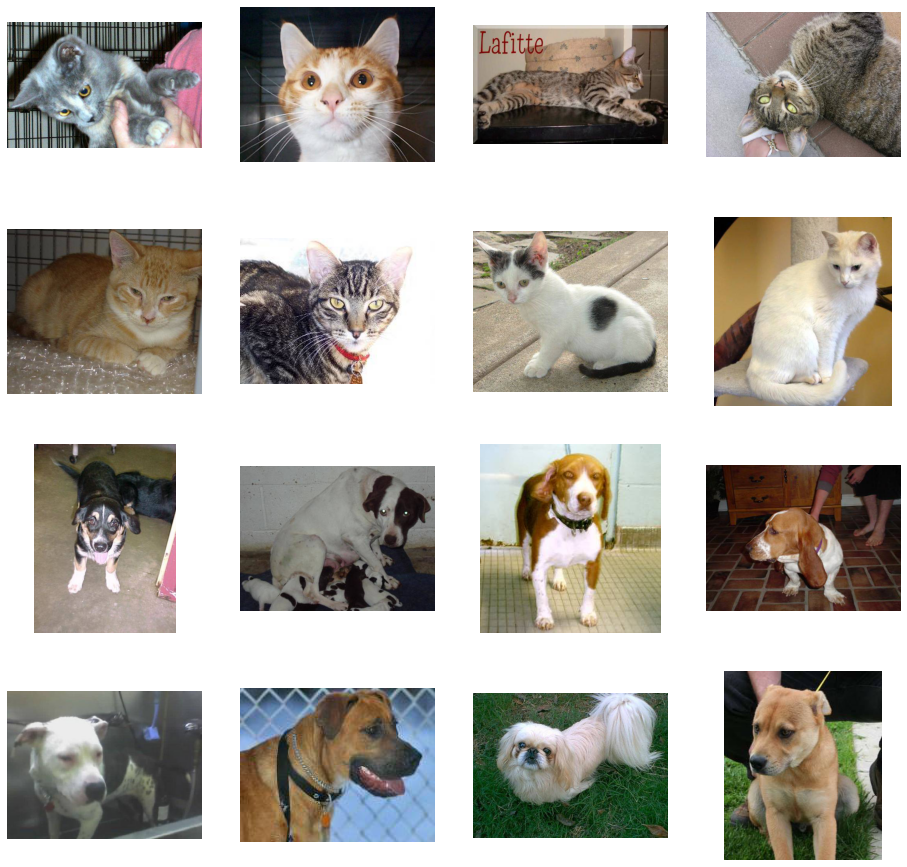

In [9]:
# Define the number of rows and columns to display images in
nrows = 4
ncols = 4

# Set the starting index for images to display
pic_index = 0

# Set the size of the figure to display images in
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# Increase the image index by 8 for the next set of images to display
pic_index += 8

# Get the file paths for the next 8 cat images and the next 8 dog images
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

# Loop through the file paths and display the images
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Create a new subplot for each image
  sp = plt.subplot(nrows, ncols, i + 1)
  
  # Turn off axis display for each subplot
  sp.axis('Off') 
  
  # Load the image using its file path and display it in the subplot
  img = mpimg.imread(img_path)
  plt.imshow(img)

# Display the plot of images
plt.show()


# **Image normalization and Re-Scaling**

In [10]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/validation',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


# **Model Training**

In this code, we have used the following techniques to achieve higher accuracy without overfitting:

Batch Normalization

Data Augmentation

Dropout Regularization

Increased depth

Using these techniques improved accuracy to 0.9091

In [11]:
# Defining the model architecture
# Using a Sequential model type and adding different layers with their corresponding parameters.
model = Sequential()

# Adding a 2D Convolutional layer with 32 filters of size 3x3, using relu activation function and input_shape of (300,300,3) - 3 color channels RGB
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)))

# Adding a 2D MaxPooling layer of size 2x2
model.add(MaxPooling2D(2, 2))

# Adding Batch Normalization layer
model.add(BatchNormalization())

# Adding another 2D Convolutional layer with 64 filters of size 3x3, using relu activation function
model.add(Conv2D(64, (3,3), activation='relu'))

# Adding another 2D MaxPooling layer of size 2x2
model.add(MaxPooling2D(2,2))

# Adding another Batch Normalization layer
model.add(BatchNormalization())

# Adding another 2D Convolutional layer with 128 filters of size 3x3, using relu activation function
model.add(Conv2D(128, (3,3), activation='relu'))

# Adding another 2D MaxPooling layer of size 2x2
model.add(MaxPooling2D(2,2))

# Adding another Batch Normalization layer
model.add(BatchNormalization())

# Adding another 2D Convolutional layer with 256 filters of size 3x3, using relu activation function
model.add(Conv2D(256, (3,3), activation='relu'))

# Adding another 2D MaxPooling layer of size 2x2
model.add(MaxPooling2D(2,2))

# Adding another Batch Normalization layer
model.add(BatchNormalization())

# Adding a Flatten layer to convert the 2D output to 1D
model.add(Flatten())

# Adding a Dense layer with 512 neurons and relu activation function
model.add(Dense(512, activation='relu'))

# Adding a Dropout layer with 0.5 rate to prevent overfitting
model.add(Dropout(0.5))

# Adding a Dense output layer with 1 neuron and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Printing the model summary
model.summary()

# Compiling the model with binary crossentropy loss function, Adam optimizer with learning rate of 0.001, and accuracy as the evaluation metric
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Defining data augmentation for the training set and scaling the pixel values by 1/255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Defining data scaling for the validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Creating data generators for the training and validation sets with specified batch size, target size, and binary classification mode
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300, 300),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(300, 300),
                                                              batch_size=32,
                                                              class_mode='binary')

# Learning rate scheduler
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 30:
        lr *= 0.1
    elif epoch > 20:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Fit the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n // train_generator.batch_size,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // validation_generator.batch_size,
                    verbose=1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 149, 149, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                      

# **Visualizing the Results**

In [12]:
# Create subplots for accuracy and loss
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Accuracy", "Model Loss"))

# Add accuracy plots to subplots
fig.add_trace(
    go.Scatter(x=list(range(1,len(history.history['accuracy'])+1)), y=history.history['accuracy'], mode='lines', name='Train Accuracy'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(1,len(history.history['val_accuracy'])+1)), y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'),
    row=1, col=1
)

# Add loss plots to subplots
fig.add_trace(
    go.Scatter(x=list(range(1,len(history.history['loss'])+1)), y=history.history['loss'], mode='lines', name='Train Loss'),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=list(range(1,len(history.history['val_loss'])+1)), y=history.history['val_loss'], mode='lines', name='Validation Loss'),
    row=1, col=2
)

# Update subplot properties
fig.update_xaxes(title_text='Epoch', row=1, col=1, range=[-1, len(history.history['accuracy'])])
fig.update_xaxes(title_text='Epoch', row=1, col=2, range=[0, len(history.history['loss'])])
fig.update_yaxes(title_text='Accuracy', range=[0.5, 1], row=1, col=1)
fig.update_yaxes(title_text='Loss', range=[0.2, max(history.history['val_loss'] + history.history['loss'])], row=1, col=2)

# Update figure layout and display
fig.update_layout(title_text="Model Performance", height=500, width=1000, template='plotly_dark')
fig.show()

# **Model Summary**

#### Summary

|Model | Number of Layers | Features | Number of Epochs   |Data Augmentation| Validation Accuracy|Validataion Loss|
|------|---------------|------------|---------|--------|--------|--------|
|M1  | 3: 16, 32, 512 units | Relu Activation Function,|5|No| 0.516 |0.3549
|M2    | 5: 32, 64, 128, 256, 512 units| Relu Activation Function|50|Yes| 0.7612 |2.0717
|M3    | 5: 32, 64, 128, 256, 512 units | Relu Activation Function, Dropout: 0.2 |50|Yes| 0.7798 |2.069
|M4    | 5: 32, 64, 128, 256, 512 units| Relu Activation Function, Dropout:0.5, Data Augmentation |50| Yes |0.8990 |0.2577
|M5    | 5: 32, 64, 128, 256, 512 units| Relu Activation Function, Dropout:0.5, Data Augmentation, Batch Normalization |50| Yes |0.9051 |0.2462
